## TITANIC SURVIVAL PREDICTION
#### Author : Shankar Bhandari
#### Batch : FEB BATCH A35
#### Domain : Data Science 
#### Aim : To build a model that predicts whether a passenger on the Titanic survived or not.


In [106]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Data Collection and Processing 

In [2]:
 #importing csv file to data frame. 
dataframe = pd.read_csv("titanic-Dataset.csv")
 #print 5 recoods from dataset 
dataframe.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataframe.shape

(891, 12)

we can see in the dataset that there are 891 rows and 12 column 

In [4]:
# information about the data 
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
 # check wherther the data have null value or not and count them. 
dataframe.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we found out that in cabin coloumn most of the values are missing which can cause inconsistent 

In [6]:
# printing duplicate value
dataframe.duplicated().sum() 

0

In [7]:
dataframe.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


We can clearly see that, there are some missing values in age column. 

### Handling missing values

In [8]:
# droping cabin column as it cantain most missing value
dataframe = dataframe.drop(columns=['Cabin'], axis=1) 
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
# Filling missing values in age column by imputing the mean
dataframe.fillna({'Age': dataframe['Age'].mean()}, inplace=True)

In [10]:
# priting the most repetitive embarked value
dataframe['Embarked'].mode()[0] 

'S'

In [11]:
# Filling missing values in embarked column by imputing the mode
dataframe.fillna({'Embarked': dataframe['Embarked'].mode()[0]}, inplace=True)
dataframe.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data analysis and visualisation

In [13]:
# printing the  number of Survived people and not survived 
dataframe['Survived'].value_counts() 

Survived
0    549
1    342
Name: count, dtype: int64

1 is for Survived people and 0 is for not survived. 


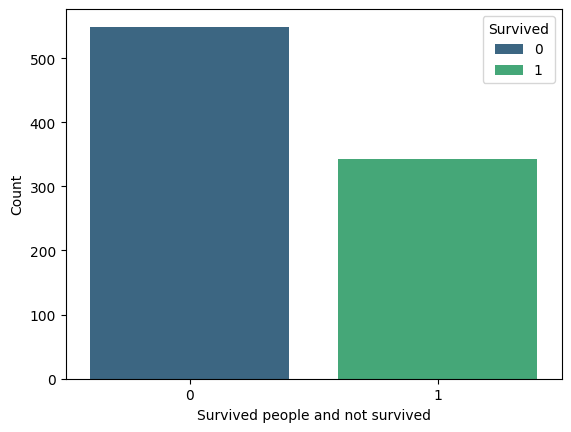

In [14]:
# showing survived's data in barplot
sbn.countplot(x='Survived', hue='Survived', data=dataframe, palette='viridis')
plt.xlabel('Survived people and not survived')
plt.ylabel('Count')
plt.show()

In [15]:
# exploring gender in data
dataframe['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

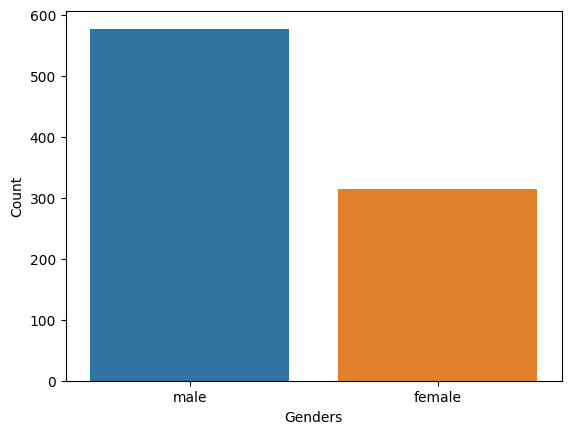

In [16]:
# showing genders's data in barplot
sbn.countplot(x='Sex', hue='Sex', data=dataframe)
plt.xlabel('Genders')
plt.ylabel('Count')
plt.show()

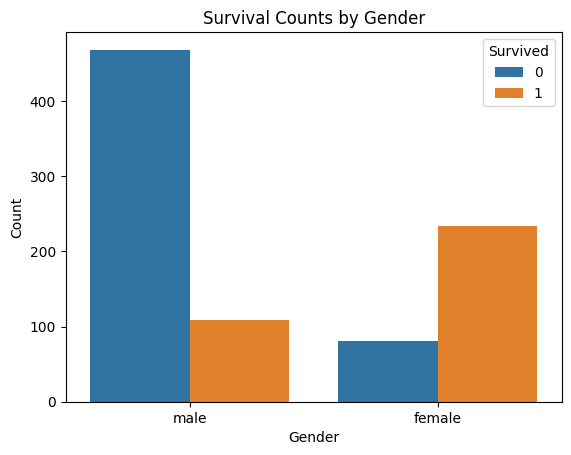

In [17]:
# visualising surviviour with respect to genders
sbn.countplot(x='Sex', hue='Survived', data=dataframe)
plt.title('Survival Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [18]:
# exploring Pclass data 
dataframe['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

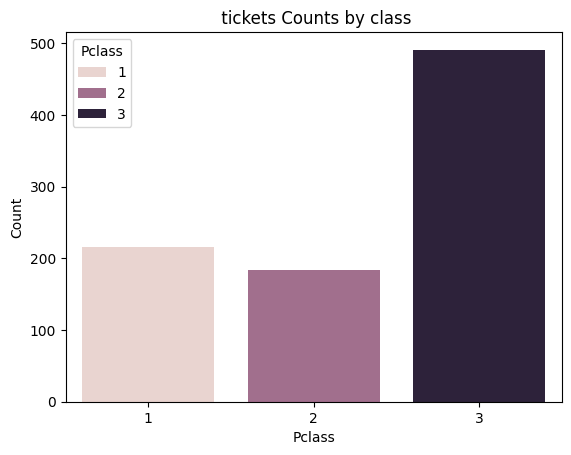

In [19]:
# visualising number of ticket class and number of people in respective class
sbn.countplot(x='Pclass', hue='Pclass', data=dataframe)
plt.title(' tickets Counts by class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

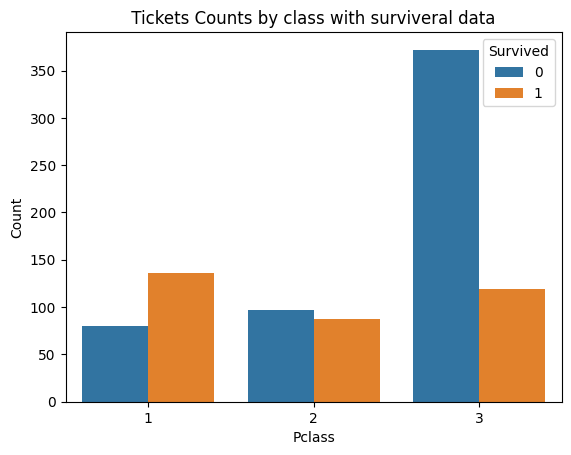

In [20]:
# visualising number of people have survived with respective class
sbn.countplot(x='Pclass', hue='Survived', data=dataframe)
plt.title(' Tickets Counts by class with surviveral data ')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

## Encoding the Categorical Data

In [27]:
## converting the gender to binary 0 and 1
dataframe['Sex'] = dataframe['Sex'].replace({'male': 1, 'female': 0}).infer_objects(copy=False)

In [26]:
## converting the Embarked to S to 0 C to 1 and Q to 2
dataframe['Embarked']=dataframe['Embarked'].replace({'S':0,'C':1,'Q':2}).infer_objects(copy=False)
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


## Seperating Feature and Target variables 

In [45]:
#  separating features and target variable is a common step in preparing data for model training.
X = dataframe.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y = dataframe.get('Survived')

In [46]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,0
1,1,0,38.000000,1,0,71.2833,1
2,3,0,26.000000,0,0,7.9250,0
3,1,0,35.000000,1,0,53.1000,0
4,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0
887,1,0,19.000000,0,0,30.0000,0
888,3,0,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [47]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Defining Training Data and Test data

In [85]:
# Split the data into training and testing sets
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=20)

In [86]:
# validating the data seperation 
X.shape, X_train.shape, X_test.shape

((891, 7), (712, 7), (179, 7))

## Model creation with logistic regression 

Logistic Regression is a statistical method used for binary classification problems, where the outcome variable is categorical and has only two possible values, typically 0 and 1. The logistic regression model estimates the probability that a given input belongs to a certain category.

In [95]:
# Create a logistic regression model
survival_model = LogisticRegression(max_iter=1000)

In [96]:
# training the model with X_train and Y_train data
survival_model.fit(X_train,Y_train)  

LogisticRegression(max_iter=1000)

## Model Evaulation and Accuracy Score 

In [97]:
# performing the prediction on test data and its accuracy level 
X_train_prediction= survival_model.predict(X_train)

In [98]:
print(X_train_prediction)

[0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0
 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1
 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1
 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0
 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 1 1 1 0 0 1 0 1 0 1 0 0 

In [99]:
training_data_accuracy_level = accuracy_score(Y_train,X_train_prediction)

In [100]:
## accuracy level on training data set 
training_data_accuracy_level

0.7991573033707865

### Performing prediction on test data 

In [101]:
X_test_prediction= survival_model.predict(X_test)
print(X_test_prediction)

[0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1]


In [102]:
training_data_accuracy_level = accuracy_score(Y_test,X_test_prediction)
print(training_data_accuracy_level)

0.8156424581005587


In [115]:
# Print the classification report on test data 
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       112
           1       0.78      0.70      0.74        67

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



In [116]:
# Print the classification report on training data 
print(classification_report(Y_train,X_train_prediction))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       437
           1       0.75      0.72      0.73       275

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712



In [117]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print(conf_matrix)

[[99 13]
 [20 47]]


In [118]:
print("[[TN, FP] \n [FN, TP]]")

[[TN, FP] 
 [FN, TP]]


 1) 99 instances were correctly classified as negative (True Negatives).
 2) 47 instances were correctly classified as positive (True Positives).
 3) 13 instances were incorrectly classified as positive (False Positives).
 4) 20 instances were incorrectly classified as negative (False Negatives).


